In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit import DataStructs

In [2]:
df = pd.read_csv('final_total', sep=' ', na_values=['na'])
df2 = df.dropna(ignore_index=True)
df2

,CHEMBLID,smiles,ido_ic50,tdo_ic50
0,CHEMBL1098875,O=C1c2cc(F)ccc2-n2c1nc1ccccc1c2=O,23.0,60.0
1,CHEMBL1209728,Cc1c(Br)oc2c1C(=O)C(=O)c1c-2ccc2c1CCCC2(C)C,10000.0,10000.0
2,CHEMBL1276265,O=C1c2ccc(Cl)cc2-n2c1nc1ccccc1c2=O,183.0,224200.0
3,CHEMBL1346056,Oc1ccccc1-c1nc2c3ccccc3c3ccccc3c2[nH]1,11790.0,12250.0
4,CHEMBL139935,O=[N+]([O-])c1cc(F)c2cccnc2c1O,14610.0,30230.0
...,...,...,...,...
755,CHEMBL5221020,O[C@@H]1CCCC[C@H]1CNc1c(Br)ccc2[nH]ncc12,1230.0,11240.0
756,CHEMBL5221102,Brc1cc(NC[C@H]2CCCN2)c2cn[nH]c2c1,56450.0,7450.0
757,CHEMBL578036,CC1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(CO)coc2-1,10000.0,450.0
758,CHEMBL584991,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Cl)c1,50.0,10000.0


In [3]:
from rdkit.Chem import SaltRemover as sr
remover = sr.SaltRemover()

In [4]:
mols = []
for i in range(len(df2['smiles'])):
    mol_i = Chem.MolFromSmiles(df2['smiles'][i])
    mol_i = remover.StripMol(mol_i, dontRemoveEverything=True)
    mols.append(mol_i)
len(mols)

760

In [5]:
#Morgan Fingerprints:
fpgen2 = AllChem.GetMorganGenerator()
i = 0
l2 = np.zeros((1, 2048), dtype='uint8')
for mol in mols:
    fp2 = fpgen2.GetFingerprintAsNumPy(mols[i])
    l2 = np.vstack((l2, fp2))
    i += 1
mfp = l2[1:, :]
mfp.shape
mfp.sum()

45791

In [6]:
dfFP = pd.DataFrame(mfp)
dfFP

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
756,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df2.loc[:, 'ido_ic50'] = (np.log10((df2.loc[:, 'ido_ic50'])*10**(-9)))*(-1)

In [8]:
df2.loc[:, 'tdo_ic50'] = (np.log10((df2.loc[:, 'tdo_ic50'])*10**(-9)))*(-1)

In [9]:
df3 = df2.loc[:, ['ido_ic50', 'tdo_ic50']]
df3

,ido_ic50,tdo_ic50
0,7.638272,7.221849
1,5.000000,5.000000
2,6.737549,3.649364
3,4.928486,4.911864
4,4.835350,4.519562
...,...,...
755,5.910095,4.949234
756,4.248336,5.127844
757,5.000000,6.346787
758,7.301030,5.000000


In [10]:
for i in range(760):
    if df3['ido_ic50'].values[i] >= 6.15:
        df3['ido_ic50'][i] = 'A'
    else:
        df3['ido_ic50'][i] = 'I'

In [11]:
for i in range(760):
    if df3['tdo_ic50'].values[i] >= 6.0:
        df3['tdo_ic50'][i] = 'A'
    else:
        df3['tdo_ic50'][i] = 'I'

/tmp/ipykernel_4869/565967957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['tdo_ic50'][i] = 'A'


In [12]:
newcol = []
for i in range(760):
    if df3['ido_ic50'].values[i] == 'A' and df3['tdo_ic50'].values[i] == 'A':
        newcol.append('AA')
    elif df3['ido_ic50'].values[i] == 'I' and df3['tdo_ic50'].values[i] == 'I':
        newcol.append('II')
    elif df3['ido_ic50'].values[i] == 'I' and df3['tdo_ic50'].values[i] == 'A':
        newcol.append('IA')
    else:
        newcol.append('AI')

In [13]:
target = pd.DataFrame(data=newcol, columns=['ido_tdo'])
target

,ido_tdo
0,AA
1,II
2,AI
3,II
4,II
...,...
755,II
756,II
757,IA
758,AI


In [14]:
encoder = LabelEncoder()

In [15]:
y_labeled = encoder.fit_transform(target['ido_tdo'])

In [16]:
y_labeled

array([0, 3, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 0, 2, 3, 3, 1, 2, 1, 2, 3, 3, 2, 3,
       3, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 1, 3, 0, 0,
       1, 3, 0, 2, 1, 3, 3, 1, 0, 1, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 1, 0,
       3, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 3, 0, 0, 3,
       0, 1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0, 3, 0,
       0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 3, 1, 1, 2, 0, 3, 3, 0, 0, 3, 0, 3,
       0, 3, 3, 3, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 3, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 3, 0, 3, 3, 3, 2, 2, 0, 1, 0, 2, 3, 0, 0, 1, 0, 0, 0,
       3, 3, 0, 0, 3, 3, 1, 2, 3, 0, 3, 0, 2, 0, 1, 3, 1, 0, 0, 3, 3, 0,
       0, 2, 1, 0, 3, 0, 3, 3, 0, 3, 3, 1, 1, 3, 3,

In [21]:
#perplexity = np.arange(1, 5)
#perplexity = np.arange(5, 55, 5)
perplexity = np.arange(55, 100, 5)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(dfFP)
    divergence.append(model.kl_divergence_)

In [22]:
divergence

[0.359982430934906,
 0.3564550280570984,
 0.35586249828338623,
 0.3450985252857208,
 0.33916398882865906,
 0.34055301547050476,
 0.3284376263618469,
 0.3342722952365875,
 0.3177184760570526]

In [23]:
tsne = TSNE(n_components=2, perplexity=100)
X_tsne = tsne.fit_transform(dfFP)
tsne.kl_divergence_

0.3103314936161041

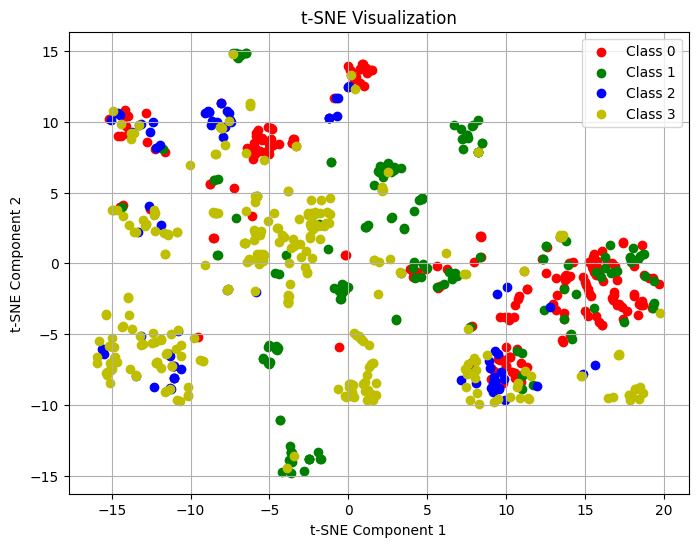

In [24]:
plt.figure(figsize=(8, 6))
for i, c in zip(np.unique(y_labeled), ['r', 'g', 'b', 'y']):
    plt.scatter(X_tsne[y_labeled == i, 0], X_tsne[y_labeled == i, 1], c=c, label=f'Class {i}')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)

In [38]:
#perplexity = np.arange(1, 5)
#perplexity = np.arange(5, 55, 5)
perplexity = np.arange(55, 100, 5)
divergence_3D = []

for i in perplexity:
    model = TSNE(n_components=3, init="pca", perplexity=i)
    reduced = model.fit_transform(dfFP)
    divergence_3D.append(model.kl_divergence_)

In [39]:
divergence_3D

[0.45028504729270935,
 0.4806716740131378,
 0.4746270775794983,
 0.4758684039115906,
 0.49135643243789673,
 0.4978052079677582,
 0.5109999775886536,
 0.48914608359336853,
 0.49940237402915955]

In [40]:
tsne = TSNE(n_components=3, perplexity=30)
X_tsne = tsne.fit_transform(dfFP)
tsne.kl_divergence_

0.3079957067966461

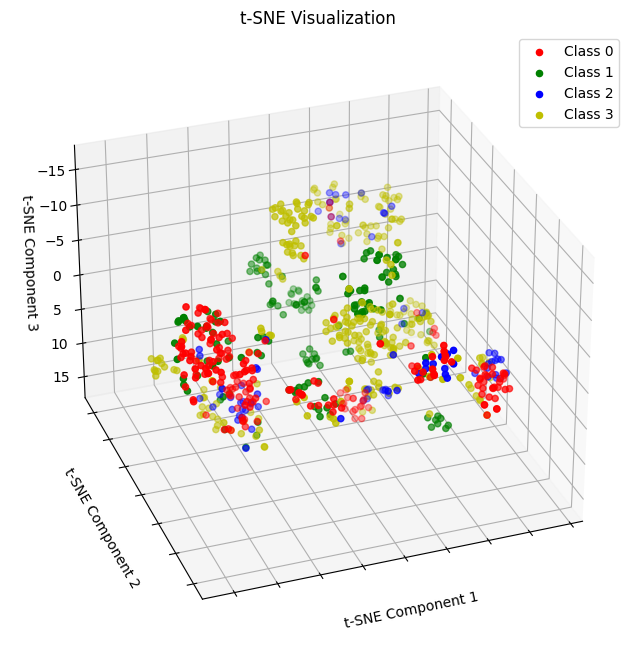

In [41]:
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(111, projection="3d", elev=-150, azim=110)
for i, c in zip(np.unique(y_labeled), ['r', 'g', 'b', 'y']):
    ax.scatter(X_tsne[y_labeled == i, 0], X_tsne[y_labeled == i, 1], X_tsne[y_labeled == i, 2], c=c, label=f'Class {i}')
ax.set_title("t-SNE Visualization")
ax.set_xlabel("t-SNE Component 1")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("t-SNE Component 2")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("t-SNE Component 3")
plt.legend();